In [35]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import defaultdict
import time as t
import pickle
import pylab as plt
import cmath as cm
from mpl_toolkits.mplot3d import Axes3D

# All Page 1 Functions

In [37]:
'''
Labels(N, chainType):
	- takes the number of unit cells and returns a list of site labels, note this is different for 
	Hydrogen and for distorted Hydrogen chain
'''
def Labels(N, chainType):
	labels = list(range(0, N))
	myLabels = []
	if chainType == "distorted_hydrogen":
		for label in labels:
			myLabels.append((label, 'a'))
			myLabels.append((label, 'b'))
	elif chainType == "hydrogen":
		for label in labels:
			myLabels.append((label, 'a'))
	return myLabels

'''
LabelToR(myLabel, chainType):
	- starting from the 0.0 we want to find where the location is. so a1 = 1 for the hydrogen
	- in distorted there are 2 blue dots, distance between blue dots in the same cell is 0.8
		- from b in cell to a in other cell its 1.2
		- from a in cell to a in other cell is a1 = 2
'''
def LabelToR(myLabel, chainType):
	spot = 0
	if chainType == "distorted_hydrogen":
		spot += myLabel[0] * 2
		if myLabel[1] == 'b':
			spot += 0.8
	elif chainType == "hydrogen":
		spot += myLabel[0] * 1
	elif chainType in ["g", "bn", "hal"]:
		a1 = np.array([1, 0])
		a2 = np.array([1/2, np.sqrt(3)/2])
		spot = myLabel[0][0] * a1 + myLabel[0][1] * a2
		if myLabel[1] == 'b':
			spot += np.array([0, 1/np.sqrt(3)])
	return spot

'''
LabelToIndex(myLabel, chainType):
	- if we had a hydrogen: (2,a) -> would be loc 2
	- other hand if we have (2,b) in distorted hydrogen that would be 4 + 1 a's loc + 1
'''
def LabelToIndex(myLabel, chainType):
	index = 0
	if chainType == "hydrogen":
		index = myLabel[0]
	elif chainType == "distorted_hydrogen":
		if myLabel[1] == 'a':
			index = 2 * myLabel[0]
		else:
			index = (2 * myLabel[0]) + 1
	return index
		
# myLabels = Labels(3, "distorted_hydrogen")
# print(myLabels)
# print(LabelToR((2, 'b'), "distorted_hydrogen"))
# print(LabelToR((0, 'b'), "distorted_hydrogen"))
# print(LabelToIndex((1, 'b'), "distorted_hydrogen"))

'''
momentumLabels(N, chainType):
	- takes the number of unit cells and returns a list of site labels, note this is different for 
	Hydrogen and for distorted Hydrogen chain, same as Labels I think?
'''
def momentumLabels(N, chainType):
	labels = list(range(0, N))
	myLabels = []
	if chainType == "distorted_hydrogen":
		for label in labels:
			myLabels.append((label, 'a'))
			myLabels.append((label, 'b'))
	elif chainType == "hydrogen":
		for label in labels:
			myLabels.append((label, 'a'))
	return myLabels

print(momentumLabels(3, "distorted_hydrogen")[0])

'''
momentumLabelsToK(myLabel, chainType, shape):
	- So here myLabel is a label like (1, 'a') from some chainType and shape is N from the previous momentumLabels
	function, so like how many unit cells were in the LabelsList that we got myLabel from.
	- tells me the wave vector k value in the reciprocal lattice
'''
def momentumLabelsToK(myLabel, chainType, shape):
	if chainType == "hydrogen":
		a1 = np.array([1])
		b1 = (2*np.pi)/(shape*np.abs(a1))
		k = myLabel[0] * b1
		return k
	elif chainType == "distorted_hydrogen":
		a1 = np.array([2])
		b1 = (2*np.pi)/(int(shape)/2*np.abs(a1))
		k = myLabel[0] * b1
		return k
		# return 2*np.pi*(myLabel[0])/(shape*2)

'''
momentumLabels2(N, chainType): included here so that we can account for graphene
'''
def momentumLabels2(N1, N2, chainType):
    myLabels = []
    if chainType in ["g", "bn", "hal"]:
        for i in range(N1):
            for j in range(N2):
                myLabels.append(((i, j), 'a'))
                myLabels.append(((i, j), 'b'))
    return myLabels

'''
momentumLabelsToK2(myLabel, chainType, shape): included here so that we can account for graphene
'''
def momentumLabelsToK2(myLabel, chainType, N1=None, N2=None):
    if chainType in ["g", "bn", "hal"]:
        if N1 == None or N2 == None:
            print("Missing N1 or N2 in the momentumLabelsToK2")
            return
        m, n = myLabel[0]
        b1 = np.array([1, -1/np.sqrt(3)])*((2*np.pi)/N1)
        b2 = np.array([0, 2/np.sqrt(3)])*((2*np.pi)/N2)
        return m*b1 + n*b2

'''
Labels2(N1, N2, chainType):
	- building two lattice vectors and labelling the sites here as well for an outer loop of N1, and inner loop
    of N2 for a total of N1*N2 labelled sites in general.
'''
def Labels2(N1, N2, chainType):
    myLabels = []
    if chainType in ["g", "bn", "hal"]:
        for i in range(N1):
            for j in range(N2):
                myLabels.append(((i, j), 'a'))
                myLabels.append(((i, j), 'b'))
    return myLabels

'''
LabelToR(myLabel, chainType): 2nd instance that was changed for graphene(g)
	- starting from the 0.0 we want to find where the location is. so a1 = 1 for the hydrogen
	- in distorted there are 2 blue dots, distance between blue dots in the same cell is 0.8
		- from b in cell to a in other cell its 1.2
		- from a in cell to a in other cell is a1 = 2
'''
def LabelToR(myLabel, chainType):
	spot = 0
	if chainType == "distorted_hydrogen":
		spot += myLabel[0] * 2
		if myLabel[1] == 'b':
			spot += 0.8
	elif chainType == "hydrogen":
		spot += myLabel[0] * 1
	elif chainType in ["g", "bn", "hal"]:
		a1 = np.array([1, 0])
		a2 = np.array([1/2, np.sqrt(3)/2])
		spot = myLabel[0][0] * a1 + myLabel[0][1] * a2
		if myLabel[1] == 'b':
			spot += np.array([0, 1/np.sqrt(3)]) # numpy arr of len 2
	return spot

'''
LabelToIndex2(myLabel, chainType, N1=None, N2=None):
	- find label from the list in the 2D lattice, think of it 1D and get the index here
'''
def LabelToIndex2(myLabel, chainType, N1=None, N2=None):
    idx = 0
    if chainType in ["g", "bn", "hal"]:
        if N1 == None or N2 == None: 
            print("N1 or N2 is missing in LabelToIndex2")
            return
        myLabels = Labels2(N1, N2, chainType)
        idx = myLabels.index(myLabel)
    return idx

(0, 'a')


# Page 1: Testing #1

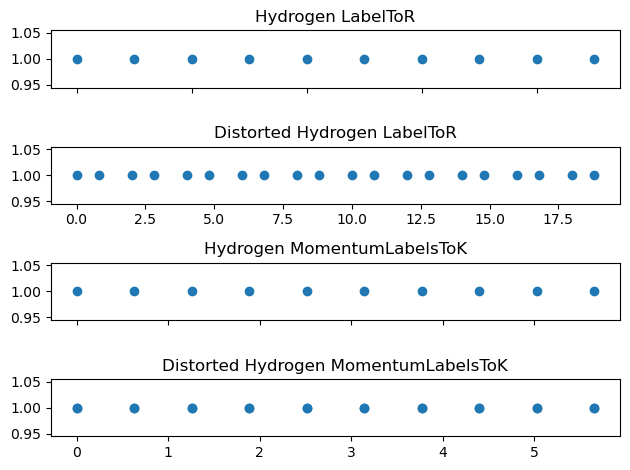

In [21]:
N = 10

test_labels = Labels(N, 'hydrogen')
x_axis_h = []
x_axis_h_k = []
for label in test_labels:
	x_axis_h.append(LabelToR(label, 'hydrogen'))
	x_axis_h_k.append(momentumLabelsToK(label, 'hydrogen', N))

test_labels = Labels(N, 'distorted_hydrogen')
x_axis_dh = []
x_axis_dh_k = []
for label in test_labels:
	x_axis_dh.append(LabelToR(label, 'distorted_hydrogen'))
	x_axis_dh_k.append(momentumLabelsToK(label, 'distorted_hydrogen', N))

fig, axs = plt.subplots(4, 1)

axs[0].scatter(x_axis_h, np.ones(N))
axs[0].set_title("Hydrogen LabelToR")
axs[0].set_xticklabels([])

axs[1].scatter(x_axis_dh, np.ones(2*N))
axs[1].set_title("Distorted Hydrogen LabelToR")

axs[2].scatter(x_axis_h_k, np.ones(N))
axs[2].set_title("Hydrogen MomentumLabelsToK")
axs[2].set_xticklabels([])

axs[3].scatter(x_axis_dh_k, np.ones(2*N))
axs[3].set_title("Distorted Hydrogen MomentumLabelsToK")

fig.tight_layout()
plt.show()

# Page 1: Testing 2

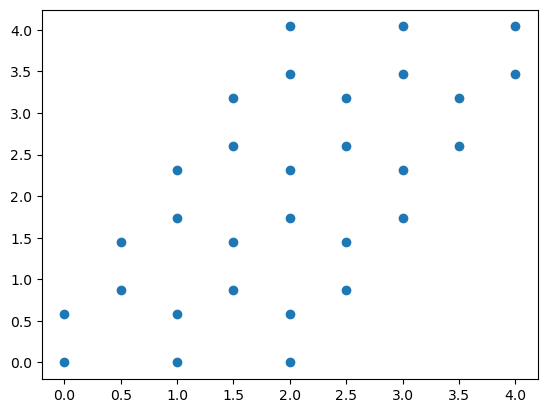

[((0, 0), 'a'), ((0, 0), 'b'), ((0, 1), 'a'), ((0, 1), 'b'), ((0, 2), 'a'), ((0, 2), 'b'), ((0, 3), 'a'), ((0, 3), 'b'), ((0, 4), 'a'), ((0, 4), 'b'), ((1, 0), 'a'), ((1, 0), 'b'), ((1, 1), 'a'), ((1, 1), 'b'), ((1, 2), 'a'), ((1, 2), 'b'), ((1, 3), 'a'), ((1, 3), 'b'), ((1, 4), 'a'), ((1, 4), 'b'), ((2, 0), 'a'), ((2, 0), 'b'), ((2, 1), 'a'), ((2, 1), 'b'), ((2, 2), 'a'), ((2, 2), 'b'), ((2, 3), 'a'), ((2, 3), 'b'), ((2, 4), 'a'), ((2, 4), 'b')]
Index of ((0, 2), 'a') = 4


In [38]:
# Checking if I can reproduce the image from the page 1 for graphene for the N1,N2 = 3,4
N1 = 3
N2 = 5

test_labels = Labels2(N1, N2, "g") # returns list of labels
points = []
x_axis = []
y_axis = []
for label in test_labels:
	currPoint = LabelToR(label, "g") # here since its graphene spot is a [x, y] extract and plot
	points.append(currPoint)
	x_axis.append(currPoint[0])
	y_axis.append(currPoint[1])

plt.figure()
plt.scatter(x_axis, y_axis)
plt.show()

point = ((0, 2), 'a')
print(Labels2(N1, N2, 'g'))
print(f"Index of {point} = {LabelToIndex2(point, 'g', N1, N2)}")

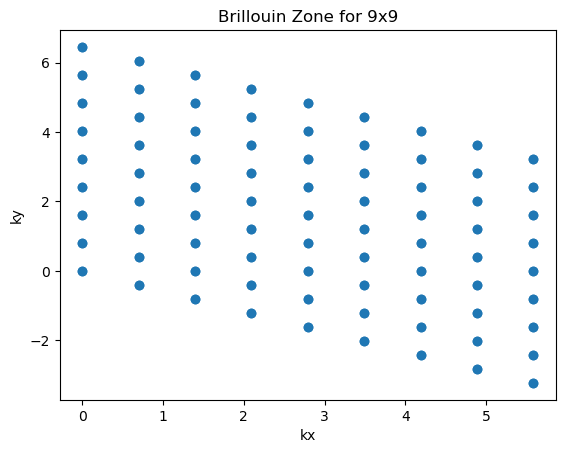

In [39]:
N1 = 9
N2 = 9

test_labels = momentumLabels2(N1, N2, 'g')

test_k = []
x_axis = []
y_axis = []
for label in test_labels:
	currPoint = momentumLabelsToK2(label, 'g', N1, N2)
	test_k.append(currPoint)
	x_axis.append(currPoint[0])
	y_axis.append(currPoint[1])

plt.figure()
plt.scatter(x_axis, y_axis)
plt.title("Brillouin Zone for 9x9")
plt.xlabel("kx")
plt.ylabel("ky")
plt.show()

# All Page 2 Functions: Tight Binding Models

## Building Hamiltonians

In [357]:
'''
Hamiltonian Matrix
	- these are always symmetric and they following the periodic boundary conditions.
'''
def create_hamiltonian_matrix(n, chainType, m=None):
    if chainType == "hydrogen":
        H = np.zeros((n, n), dtype=int)
        for i in range(n):
            for j in range(n):
                if abs(i - j) == 1:
                    H[i, j] = -1
        H[0, n-1] = H[n-1, 0] = -1
    elif chainType == "distorted_hydrogen":
        N = 2 * n  
        H = np.zeros((N,N), dtype=float)
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                if i % 2 == 0:
                    H[i, i+1] = H[i+1, i] = -1
                elif i < N - 1 and j < N - 1:
                    H[i, i+1] = H[i+1, i] = -0.1
        H[0, N-1] = H[N-1, 0] = -0.1
    elif chainType == "g":
        N1 = n[0]
        N2 = n[1]
        labelsList = Labels2(N1, N2, chainType)
        N = len(labelsList)
        print(N)
        H = np.zeros((N, N), dtype=float)
    
        neighbor_vectors = [(0, 0), (0, -1), (1, -1)]

        for i, label in enumerate(labelsList):
            (x, y), atom_type = label
            if atom_type == 'a':
                for vec in neighbor_vectors:
                    nx = (x + vec[0]) % N1
                    ny = (y + vec[1]) % N2
                    neighbor_label = ((nx, ny), 'b')
                    if (neighbor_label in labelsList):
                        j = LabelToIndex2(neighbor_label, chainType, N1, N2)
                        H[i, j] = H[j, i] = -1
    elif chainType == "bn":
        M = 0.1
        N1 = n[0]
        N2 = n[1]
        labelsList = Labels2(N1, N2, chainType)
        N = len(labelsList)
        H = np.zeros((N, N), dtype=float)

        for i, label in enumerate(labelsList):
            _, atom_type = label
            if atom_type == 'a':
                H[i, i] = M
            else:  
                H[i, i] = -M

        neighbor_vectors = [(0, 0), (0, -1), (1, -1)]
        for i, label in enumerate(labelsList):
            (x, y), atom_type = label
            if atom_type == 'a':
                for vec in neighbor_vectors:
                    nx = (x + vec[0]) % N1
                    ny = (y + vec[1]) % N2
                    neighbor_label = ((nx, ny), 'b')
                    j = LabelToIndex2(neighbor_label, chainType, N1, N2)
                    H[i, j] = H[j, i] = -1
    elif chainType == "hal":
        N1 = n[0]
        N2 = n[1]
        t = 0.3  
        phi = 0.7 
        M = m
        labelsList = Labels2(N1, N2, chainType)
        N = len(labelsList)
        H = np.zeros((N, N), dtype=complex)

        # This part here is the same as building BNHamiltonian
        for i, label in enumerate(labelsList):
            _, atom_type = label
            if atom_type == 'a':
                H[i, i] = M
            else:  
                H[i, i] = -M
        
        neighbor_vectors = [(0, 0), (0, -1), (1, -1)]
        for i, label in enumerate(labelsList):
            (x, y), atom_type = label
            if atom_type == 'a':
                for vec in neighbor_vectors:
                    nx = (x + vec[0]) % N1
                    ny = (y + vec[1]) % N2
                    neighbor_label = ((nx, ny), 'b')
                    j = LabelToIndex2(neighbor_label, chainType, N1, N2)
                    H[i, j] = H[j, i] = -1
        
        nnn_vectors_a = [((0, 1), phi), ((1, -1), phi), ((-1, 0), phi),  # Clockwise
                        ((0, -1), -phi), ((-1, 1), -phi), ((1, 0), -phi)]  # Counter-clockwise

        nnn_vectors_b = [((0, -1), phi), ((-1, 1), phi), ((1, 0), phi),  # Clockwise
                        ((0, 1), -phi), ((1, -1), -phi), ((-1, 0), -phi)]  # Counter-clockwise

        for i, label in enumerate(labelsList):
            (x, y), atom_type = label
            nnn_vectors = nnn_vectors_a if atom_type == 'a' else nnn_vectors_b
            for vec, phase in nnn_vectors:
                nx = (x + vec[0]) % N1
                ny = (y + vec[1]) % N2
                neighbor_label = ((nx, ny), atom_type)  
                j = LabelToIndex2(neighbor_label, chainType, N1, N2)
                if i < j:  
                    H[i, j] += -t * np.exp(1j * phase)
                    H[j, i] += -t * np.exp(-1j * phase)

    return H

## Building Fourier Matrices

In [41]:
'''
Fourier Matrix: using this to transform the hamiltonian from a real space into the momentum space.
'''
def create_fourier_matrix(n, chainType):
	if chainType == "hydrogen":
		N = n
		F = np.zeros((N,N), dtype=complex)
		for i in range(N):
			for j in range(N):
				labelJ = (j, 'a')
				labelI = (i, 'a')
				kj = momentumLabelsToK(labelJ, chainType, N)
				ri = LabelToR(labelI, chainType)
				F[i, j] = (1/np.sqrt(N)) * np.exp(1j * kj[0] * ri)
	elif chainType == "distorted_hydrogen":
		N = 2*n
		F = np.zeros((N,N), dtype=complex)
		for i in range(N):
			for j in range(N):
				kj = momentumLabelsToK((momentumLabels(N, chainType)[j]), chainType, N)
				sigma = momentumLabels(N, chainType)[j][1]
				ri = LabelToR((Labels(N, chainType)[i]), chainType)
				sigmaPrime = Labels(N, chainType)[i][1]
				delta_ss = int(sigma == sigmaPrime)
				F[i, j] = (1/np.sqrt(n)) * delta_ss * np.exp(1j * kj[0] * ri)
	elif chainType in ['g', 'bn', 'hal']:
		N1 = n[0]
		N2 = n[1]
		N = 2 * N1 * N2
		F = np.zeros((N,N), dtype=complex)
		for i in range(N):
			for j in range(N):
				kj = momentumLabelsToK2((momentumLabels2(N1, N2, chainType)[j]), chainType, N1, N2)
				sigma = momentumLabels2(N1, N2, chainType)[j][1]
				ri = LabelToR((Labels2(N1, N2, chainType)[i]), chainType)
				sigmaPrime = Labels2(N1, N2, chainType)[i][1]
				delta_ss = int(sigma == sigmaPrime)
				F[i, j] = (1/np.sqrt(N1 * N2)) * delta_ss * np.exp(1j * np.dot(kj, ri))
	return F

## Hydrogen Chain, Distorted Hydrogen Chain

FFdagger equals the identity matrix.


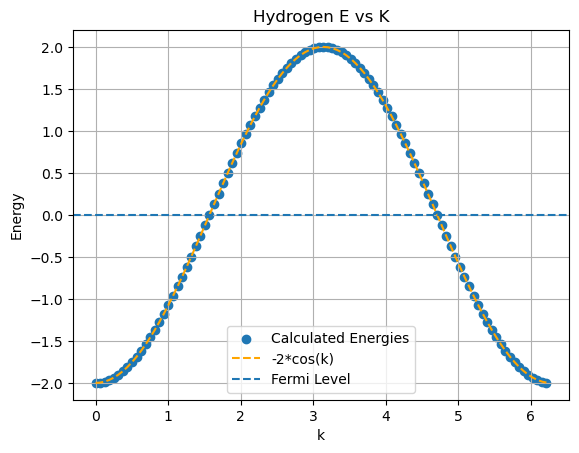

In [43]:
n=100
F = create_fourier_matrix(n, chainType="hydrogen")
F_dagger = F.T.conj()
output = np.dot(F, F_dagger)
I = np.eye(F.shape[0])
if np.allclose(output, I):
    print("FFdagger equals the identity matrix.")
else:
    print("FFdagger does not equal the identity matrix.")

# Do a plt.matshow on Hk to make sure its diagonal
H = create_hamiltonian_matrix(n, chainType="hydrogen")
Hk = F_dagger @ H @ F

energies = np.diag(Hk)
kvec = []
for j in range(n):
    labelJ = (j, 'a')
    kvec.append(momentumLabelsToK(labelJ, "hydrogen", n))
cos_vals = -2 * np.cos(kvec)

# Plot the calculated energies vs. the expected dispersion relation
plt.scatter(kvec, energies, marker='o', linestyle='-', label='Calculated Energies')
plt.plot(kvec, cos_vals, linestyle='--', color='orange', label='-2*cos(k)')
plt.axhline(0, linestyle='--', label='Fermi Level', )
plt.xlabel('k')
plt.ylabel('Energy')
plt.title('Hydrogen E vs K')
plt.legend()
plt.grid(True)
plt.show()

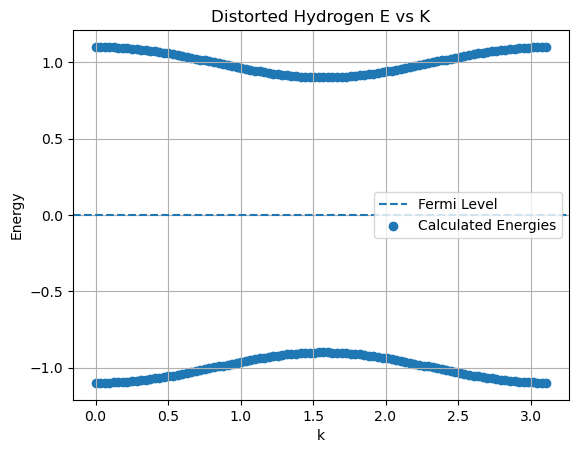

In [44]:
n=100
F = create_fourier_matrix(n, chainType="distorted_hydrogen")
F_dagger = np.conjugate(F).T
output = F @ F_dagger
I = np.eye(F.shape[0])
H = create_hamiltonian_matrix(n, chainType="distorted_hydrogen")
Hk = F_dagger @ H @ F
# plt.matshow(H)
# plt.matshow(np.abs(Hk))

energies = []
for i in range(int(len(Hk)/2)):
	i1, i2 = 2*i, 2*i + 2
	block = Hk[i1:i2,i1:i2]
	eigs, vecs = np.linalg.eigh(block)
	for eig in eigs:
		energies.append(eig)

kvec = []
N = 2*n
for j in range(n):
	label1 = (j, 'a')
	label2 = (j, 'b')
	kvec.append(momentumLabelsToK(label1, "distorted_hydrogen", N))
	kvec.append(momentumLabelsToK(label2, "distorted_hydrogen", N))

# Plot the Fermi level, calculated energies vs. the expected dispersion relation
plt.axhline(0, linestyle='--', label='Fermi Level', )
plt.scatter(kvec, energies, marker='o', linestyle='-', label='Calculated Energies')
plt.xlabel('k')
plt.ylabel('Energy')
plt.title('Distorted Hydrogen E vs K')
plt.legend()
plt.grid(True)
plt.show()

## Graphene, Boron Nitride, Haldene Small Testing

50


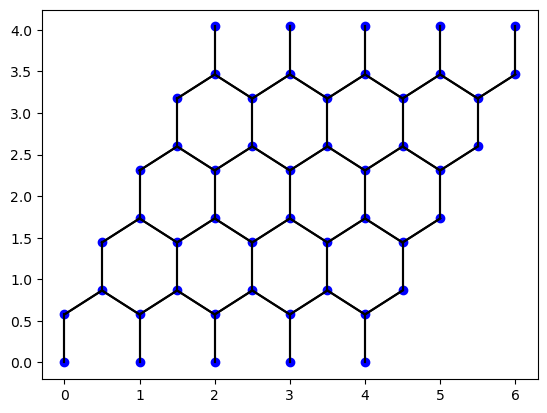

In [45]:
# Graphene
n = (5,5)
chainType = "g"
Hr = create_hamiltonian_matrix(n, chainType)

test_labels = Labels2(n[0], n[1], 'g')
points = []
x_axis = []
y_axis = []
for label in test_labels:
	currPoint = LabelToR(label, "g") # here since its graphene spot is a [x, y] extract
	points.append(currPoint)
	x_axis.append(currPoint[0])
	y_axis.append(currPoint[1])

fig, ax = plt.subplots()
for i in range(Hr.shape[0]):
    for j in range(Hr.shape[1]):
        if Hr[i, j] == -1:
            x1, y1 = points[i]
            x2, y2 = points[j]
            if np.sqrt((x1-x2)**2 + (y1-y2)**2) > 1:
                continue
            plt.plot([x1, x2], [y1, y2], 'k-')

plt.scatter(x_axis, y_axis, color='blue')
plt.show()

50


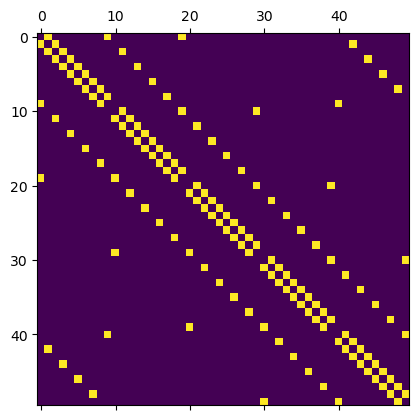

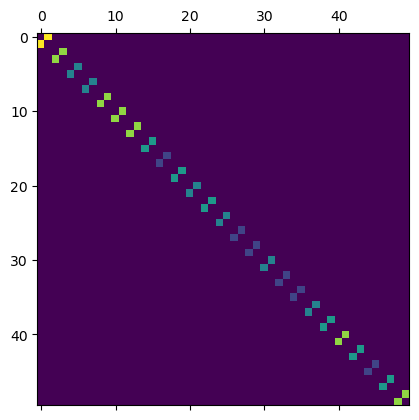

In [164]:
# Getting Hr, Hk for Graphene
n = (5,5)
chainType = "g"
F = create_fourier_matrix(n, chainType)
F_dagger = np.conjugate(F).T
output = F @ F_dagger
# plt.matshow(np.abs(output))
Hr = create_hamiltonian_matrix(n, chainType)
plt.matshow(np.abs(Hr))
Hk = F_dagger @ Hr @ F
plt.matshow(np.abs(Hk))

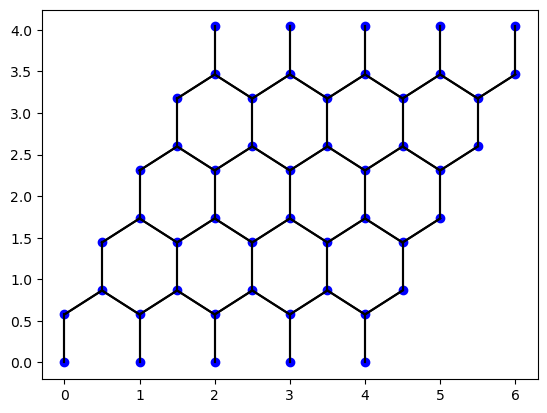

In [166]:
# Boron Nitride
n = (5,5)
chainType = "bn"
Hr = create_hamiltonian_matrix(n, chainType)

test_labels = Labels2(n[0], n[1], 'bn')
points = []
x_axis = []
y_axis = []
for label in test_labels:
	currPoint = LabelToR(label, "bn") # here since its graphene spot is a [x, y] extract
	points.append(currPoint)
	x_axis.append(currPoint[0])
	y_axis.append(currPoint[1])

fig, ax = plt.subplots()
for i in range(Hr.shape[0]):
    for j in range(Hr.shape[1]):
        if Hr[i, j] == -1:
            x1, y1 = points[i]
            x2, y2 = points[j]
            if np.sqrt((x1-x2)**2 + (y1-y2)**2) > 1:
                continue
            plt.plot([x1, x2], [y1, y2], 'k-')

plt.scatter(x_axis, y_axis, color='blue')
plt.show()

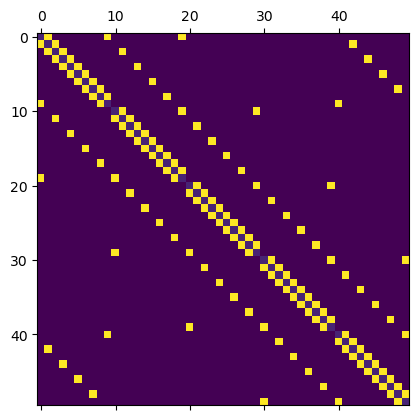

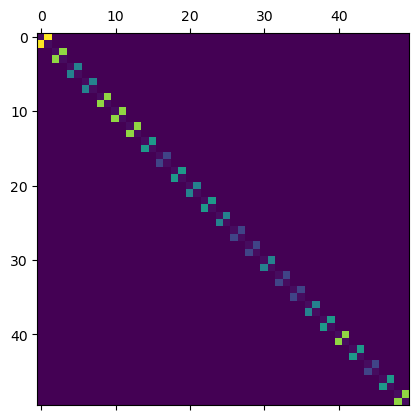

In [358]:
n = (5,5)
chainType = "bn"
F = create_fourier_matrix(n, chainType)
F_dagger = np.conjugate(F).T
output = F @ F_dagger
# plt.matshow(np.abs(output))
Hr = create_hamiltonian_matrix(n, chainType)
plt.matshow(np.abs(Hr))
Hk = F_dagger @ Hr @ F
plt.matshow(np.abs(Hk))

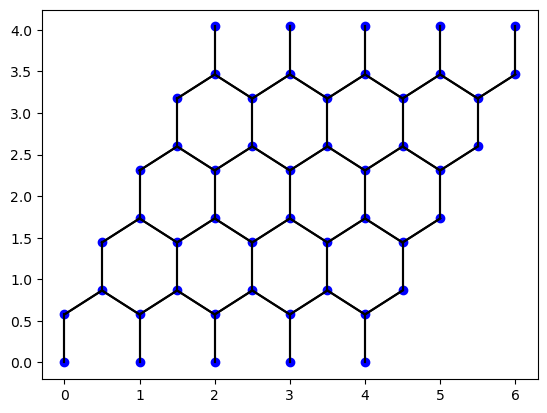

In [359]:
# Haldene
n = (5,5)
chainType = "hal"
Hr = create_hamiltonian_matrix(n, chainType, m=0.1)

test_labels = Labels2(n[0], n[1], 'hal')
points = []
x_axis = []
y_axis = []
for label in test_labels:
    currPoint = LabelToR(label, "hal")
    points.append(currPoint)
    x_axis.append(currPoint[0])
    y_axis.append(currPoint[1])

fig, ax = plt.subplots()
for i in range(Hr.shape[0]):
    for j in range(Hr.shape[1]):
        if Hr[i, j] == -1:
            x1, y1 = points[i]
            x2, y2 = points[j]
            if np.sqrt((x1-x2)**2 + (y1-y2)**2) > 1:
                continue
            plt.plot([x1, x2], [y1, y2], 'k-')

plt.scatter(x_axis, y_axis, color='blue')
plt.show()

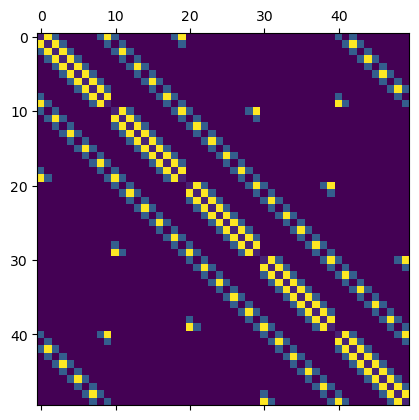

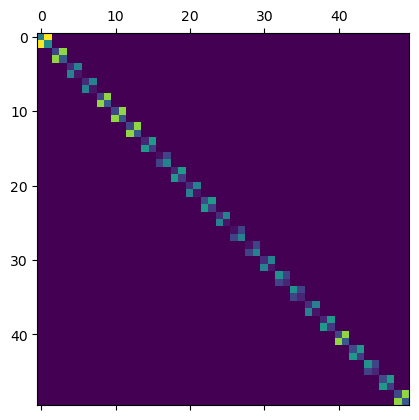

In [360]:
n = (5,5)
chainType = "hal"
F = create_fourier_matrix(n, chainType)
F_dagger = np.conjugate(F).T
output = F @ F_dagger
Hr = create_hamiltonian_matrix(n, chainType, m=0.1)
plt.matshow(np.abs(Hr))
Hk = F_dagger @ Hr @ F
plt.matshow(np.abs(Hk))

## Main Graphene

In [196]:
n = (27,27)
chainType = "g"
F = create_fourier_matrix(n, chainType)
F_dagger = np.conjugate(F).T
output = F @ F_dagger
# plt.matshow(np.abs(output))
Hr = create_hamiltonian_matrix(n, chainType)
# plt.matshow(np.abs(Hr))
Hk = F_dagger @ Hr @ F
# plt.matshow(np.abs(Hk))

1458


In [197]:
energies = []
for i in range(int(len(Hk)/2)):
	i1, i2 = 2*i, 2*i + 2
	block = Hk[i1:i2,i1:i2]
	eigs, vecs = np.linalg.eigh(block)
	for eig in eigs:
		energies.append(eig)

kvec = []
xPoints = []
yPoints = []
for x in range(27): 
    for y in range(27):  
        for atom_type in ['a', 'b']:
            labelJ = ((x, y), atom_type)
            k = momentumLabelsToK2(labelJ, "g", n[0], n[1])
            kvec.append(k)
            xPoints.append(k[0])
            yPoints.append(k[1])

threshold = 1e-15
gaps = []
for i in range(0, len(energies), 2):
    gap = np.abs(energies[i]-energies[i+1])
    if gap < threshold:
        gap = 0.0
    gaps.append(gap)

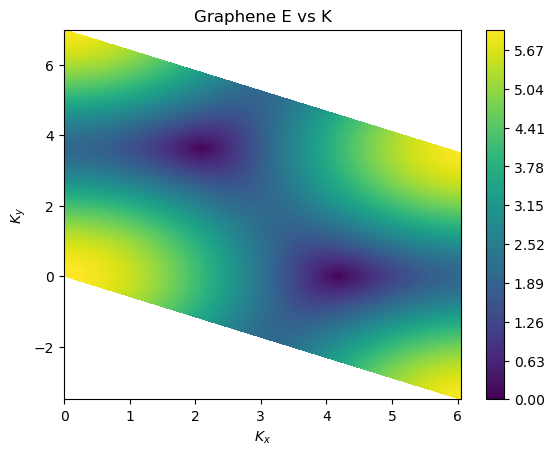

In [198]:
plt.figure()
plt.title(f"Graphene E vs K")
plt.tricontourf(xPoints[::2], yPoints[::2], gaps, levels = 200)
plt.colorbar()
plt.xlabel(r"$K_x$")
plt.ylabel(r"$K_y$")
plt.show()

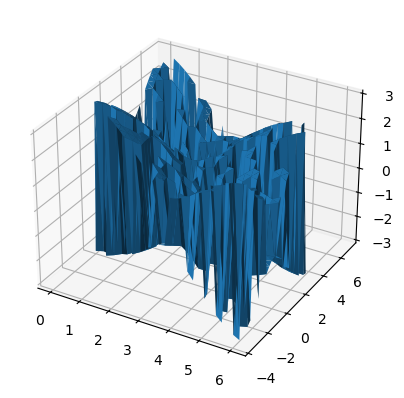

In [199]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xPoints,yPoints,energies)

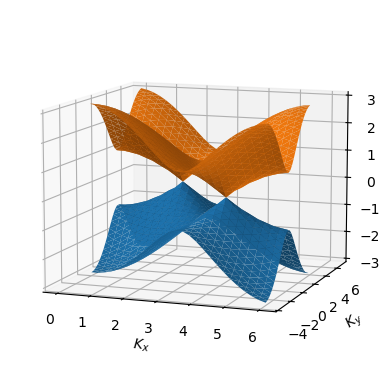

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xPoints[::2],yPoints[::2],energies[::2])
ax.plot_trisurf(xPoints[1::2],yPoints[1::2],energies[1::2])
ax.set_xlabel(r"$K_x$")
ax.set_ylabel(r"$K_y$")
ax.set_zlabel("Energy")

elev = 10 
azim = -70
ax.view_init(elev=elev, azim=azim)
plt.show()

In [206]:
xs_where_0 = []
for i in range(0, len(xPoints), 2):
    if np.abs(energies[i]-energies[i+1]) == 0.0:
        xs_where_0.append(xPoints[i])

if len(xs_where_0) > 0:
    this_x = np.random.choice(xs_where_0)
    indices = []
    for i in range(len(xPoints)):
        if xPoints[i] == this_x:
            indices.append(i)
    indices = np.array(indices)
    plt.figure()
    these_ys = yPoints[indices[0]:indices[-1]+1]
    these_Es = energies[indices[0]:indices[-1]+1]
    plt.plot(these_ys[::2], these_Es[::2])
    plt.plot(these_ys[1::2], these_Es[1::2])
    plt.xlabel(r"$K_y$")
    plt.ylabel("Energy")
    plt.title(r"Graphene Energies for $K_x$ = " + f"{this_x}")
    plt.legend()
    plt.show()
else:
    print("No x points found where energies are equal. THIS IS ERROR WE SHOULD SEE GAP")

No x points found where energies are equal. THIS IS ERROR WE SHOULD SEE GAP


## Main Boron Nitride

In [208]:
n = (27,27)
chainType = "bn"
F = create_fourier_matrix(n, chainType)
F_dagger = np.conjugate(F).T
output = F @ F_dagger
Hr = create_hamiltonian_matrix(n, chainType)
Hk = F_dagger @ Hr @ F

In [209]:
energies = []
for i in range(int(len(Hk)/2)):
	i1, i2 = 2*i, 2*i + 2
	block = Hk[i1:i2,i1:i2]
	eigs, vecs = np.linalg.eigh(block)
	for eig in eigs:
		energies.append(eig)

kvec = []
xPoints = []
yPoints = []
for x in range(27): 
    for y in range(27):  
        for atom_type in ['a', 'b']:
            labelJ = ((x, y), atom_type)
            k = momentumLabelsToK2(labelJ, "bn", n[0], n[1])
            kvec.append(k)
            xPoints.append(k[0])
            yPoints.append(k[1])

threshold = 1e-15
gaps = []
for i in range(0, len(energies), 2):
    gap = np.abs(energies[i]-energies[i+1])
    if gap < threshold:
        gap = 0.0
    gaps.append(gap)

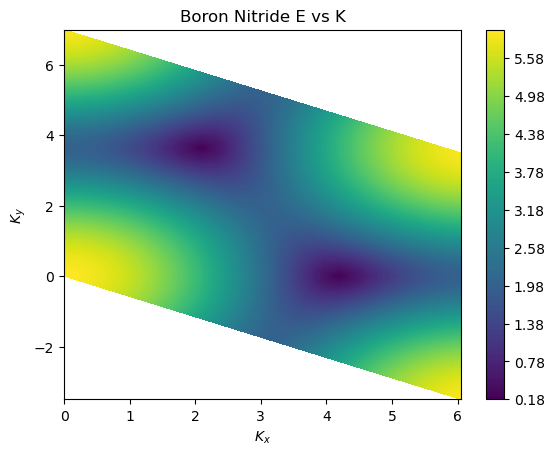

In [210]:
plt.figure()
plt.title(f"Boron Nitride E vs K")
plt.tricontourf(xPoints[::2], yPoints[::2], gaps, levels = 200)
plt.colorbar()
plt.xlabel(r"$K_x$")
plt.ylabel(r"$K_y$")
plt.show()

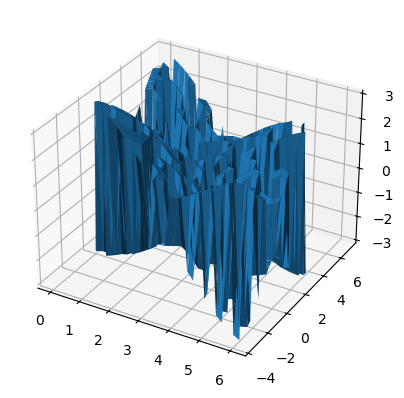

In [211]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xPoints,yPoints,energies)

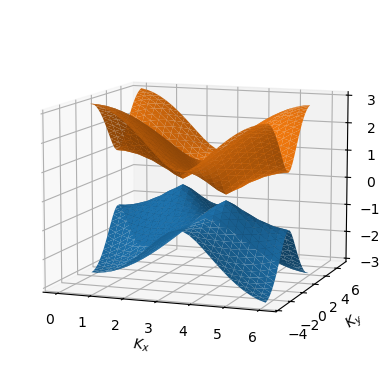

In [212]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xPoints[::2],yPoints[::2],energies[::2])
ax.plot_trisurf(xPoints[1::2],yPoints[1::2],energies[1::2])
ax.set_xlabel(r"$K_x$")
ax.set_ylabel(r"$K_y$")
ax.set_zlabel("Energy")

elev = 10 
azim = -70
ax.view_init(elev=elev, azim=azim)
plt.show()
plt.show()

## Main Haldene

In [213]:
n = (27,27)
chainType = "hal"
F = create_fourier_matrix(n, chainType)
F_dagger = np.conjugate(F).T
output = F @ F_dagger
Hr = create_hamiltonian_matrix(n, chainType)
Hk = F_dagger @ Hr @ F

In [214]:
energies = []
for i in range(int(len(Hk)/2)):
	i1, i2 = 2*i, 2*i + 2
	block = Hk[i1:i2,i1:i2]
	eigs, vecs = np.linalg.eigh(block)
	for eig in eigs:
		energies.append(eig)

kvec = []
xPoints = []
yPoints = []
for x in range(27): 
    for y in range(27):  
        for atom_type in ['a', 'b']:
            labelJ = ((x, y), atom_type)
            k = momentumLabelsToK2(labelJ, "hal", n[0], n[1])
            kvec.append(k)
            xPoints.append(k[0])
            yPoints.append(k[1])

threshold = 1e-15
gaps = []
for i in range(0, len(energies), 2):
    gap = np.abs(energies[i]-energies[i+1])
    if gap < threshold:
        gap = 0.0
    gaps.append(gap)

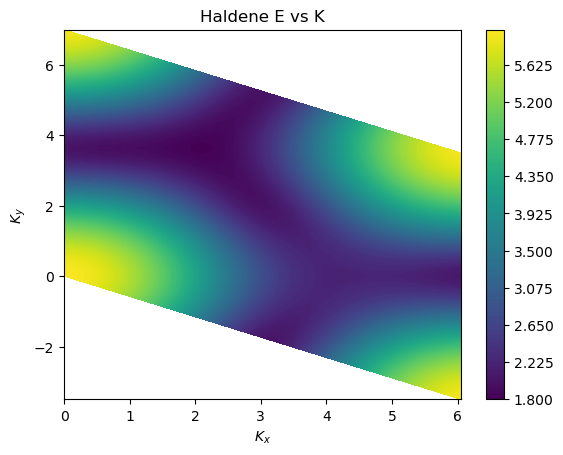

In [215]:
plt.figure()
plt.title(f"Haldene E vs K")
plt.tricontourf(xPoints[::2], yPoints[::2], gaps, levels = 200)
plt.colorbar()
plt.xlabel(r"$K_x$")
plt.ylabel(r"$K_y$")
plt.show()

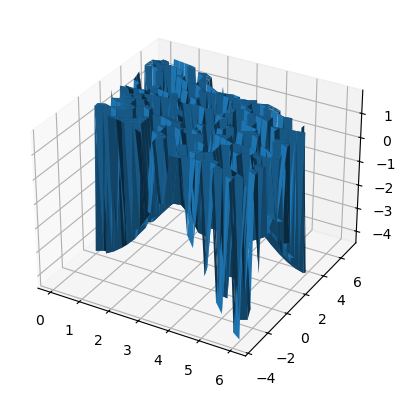

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xPoints,yPoints,energies)

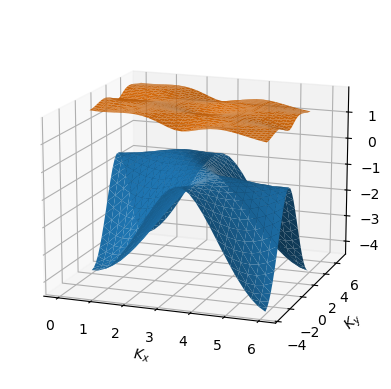

In [223]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xPoints[::2],yPoints[::2],energies[::2])
ax.plot_trisurf(xPoints[1::2],yPoints[1::2],energies[1::2])
ax.set_xlabel(r"$K_x$")
ax.set_ylabel(r"$K_y$")
ax.set_zlabel("Energy")

elev = 15
azim = -70
ax.view_init(elev=elev, azim=azim)
plt.show()

# Page 3: Topological Insulators

## Measuring the Gap

In [232]:
def direct_gap(Es):
    smallest = np.abs(Es[0]-Es[1])
    for i in range(0, len(Es), 2):
        gap = np.abs(Es[i]-Es[i+1])
        if gap < smallest:
            smallest = gap
    return smallest

In [241]:
n = (15,15)
chainType = "hal"

F = create_fourier_matrix(n, chainType)
F_dagger = np.conjugate(F).T

Ms = [0, 0.8, 1.0, 1.2, 2.0]
direct_gaps = []
for M in Ms:
    print(f"M = {M}")
    Hr = create_hamiltonian_matrix(n, chainType, m=M)
    Hk = F_dagger @ Hr @ F
    
    Es = []
    for i in range(int(len(Hk)/2)):
        i1, i2 = 2*i, 2*i + 2
        block = Hk[i1:i2,i1:i2]
        eigs, vecs = np.linalg.eigh(block)
        for eig in eigs:
            Es.append(eig)
    direct_gaps.append(direct_gap(Es))


M = 0
M = 0.8
M = 1.0
M = 1.2
M = 2.0


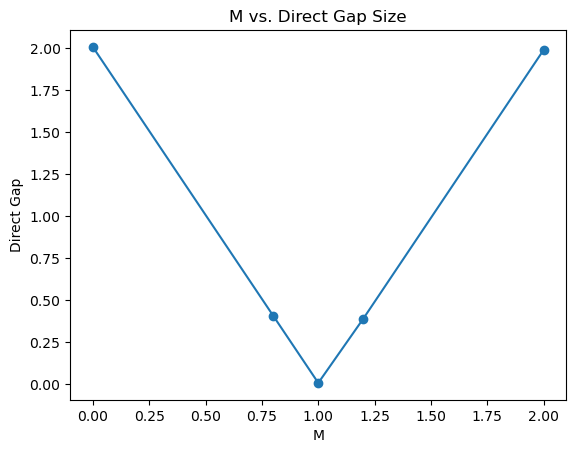

In [242]:
plt.figure()
plt.plot(Ms, direct_gaps)
plt.scatter(Ms, direct_gaps)
plt.xlabel("M")
plt.ylabel("Direct Gap")
plt.title("M vs. Direct Gap Size")
plt.show()

## Computing the Berry Phase

In [346]:
def momentumLabels2(N1, N2, chainType):
    myLabels = []
    if chainType in ["g", "bn", "hal"]:
        for i in range(N1):
            for j in range(N2):
                myLabels.append(((i, j), 'a'))
                myLabels.append(((i, j), 'b'))

    return myLabels

def momentum_index_to_label(i, atom_type, N1, N2):
    if atom_type in ['g', 'bn', 'hal']:
        label_list = momentumLabels2(N1, N2, 'hal')
        return label_list[i]

In [347]:
def angle_to_range(val):
    angle = np.angle(val)
    in_range = angle <= np.pi and angle > -np.pi
    while not in_range:
        if angle > np.pi:
            angle -= 2*np.pi
        else:
            angle += 2*np.pi
        in_range = angle <= np.pi and angle > -np.pi
    return angle
    
def plaquette(index, n, E_vecs):
    n1, n2 = n
    x1, y1 = momentum_index_to_label(index, 'hal', 15, 15)[0]
    x2 = (x1 + 1) % n1
    y2 = (y1 + 1) % n2
    coords = [(x1, y1), (x2, y1), (x2, y2), (x1, y2)]

    pts = []
    for coord in coords:
        index = LabelToIndex2((coord, 'a'), 'hal', n1, n2)
        pts.append(index)

    mult_sum = 1
    for i in range(len(pts)):
        next_i = (i + 1) % len(pts)
        mult_sum *= np.conj(E_vecs[pts[i]].T) @ E_vecs[pts[next_i]]
    phase = angle_to_range(mult_sum)
    return float(phase)

In [348]:
n = (15,15)
chainType = "hal"

Ms = [0, 0.8, 1.0, 1.2, 2]
H_ks = []
for M in Ms:
    F = create_fourier_matrix(n, chainType)
    F_dagger = np.conjugate(F).T
    Hr = create_hamiltonian_matrix(n, chainType, m=M)
    Hk = F_dagger @ Hr @ F
    H_ks.append(Hk)

Eigenvectors = []
for j in range(len(H_ks)):
    H_k = H_ks[j]
    E_vecs = []
    for i in range(int(len(H_k)/2)):
        i1, i2 = 2*i, 2*i + 2
        block = H_k[i1:i2,i1:i2]
        eigs, vecs = np.linalg.eigh(block)
        E_vecs.append(vecs[:, 0])
        E_vecs.append(vecs[:, 0])
    Eigenvectors.append(E_vecs)

print(Eigenvectors[1][:10])
print(type(Eigenvectors))

[array([0.70710678+0.j, 0.70710678+0.j]), array([0.70710678+0.j, 0.70710678+0.j]), array([-0.70710678+0.j        , -0.70710648-0.00065111j]), array([-0.70710678+0.j        , -0.70710648-0.00065111j]), array([-0.70710678+0.j        , -0.70708578-0.00545019j]), array([-0.70710678+0.j        , -0.70708578-0.00545019j]), array([-0.70710678+0.j       , -0.70682631-0.0199141j]), array([-0.70710678+0.j       , -0.70682631-0.0199141j]), array([-0.70710678+0.j        , -0.70510269-0.05319964j]), array([-0.70710678+0.j        , -0.70510269-0.05319964j])]
<class 'list'>


In [363]:
berry_fluxes = []
for j in range(len(H_ks)):
    E_vecs = Eigenvectors[j]
    berry_flux = []
    for i in range(0, len(E_vecs), 2):
        result = plaquette(i, (15,15), E_vecs)
        berry_flux.append(-result) 
    berry_fluxes.append(berry_flux)

print(berry_fluxes[1])

[4.668949352827288e-19, -6.198656799227208e-06, 9.399524238587345e-05, 0.0006807583502193551, 0.002808546308797493, 0.009309367746468069, 0.0254938945619673, 0.045415871413788125, 0.03801987962473023, 0.01651595167211806, 0.005359840753216721, 0.0014713974335065613, 0.0002971419550891768, 2.167300046692662e-05, 0.004321775049726175, 4.3117326140271935e-05, 2.9008142780252893e-05, 7.8046282326711e-06, 0.0001611355216293133, 0.0010552423457725045, 0.004482899196386066, 0.016103549356641125, 0.044953878741481504, 0.059760568990417755, 0.029629699142638764, 0.008880213806252646, 0.0022916745031865545, 0.00047416831648235504, 5.686015299131414e-05, 0.014482979088726141, 0.000278981991630159, 0.0002747985642984344, 0.0002629269416052674, 0.000315226709574026, 0.0006995186165519549, 0.002328063551199691, 0.00867949554150394, 0.03302357181374262, 0.08273901561901012, 0.06121143773479268, 0.01762221576119024, 0.004556403287823181, 0.0013005256741094753, 0.0004741683164824204, 0.0291023329114994

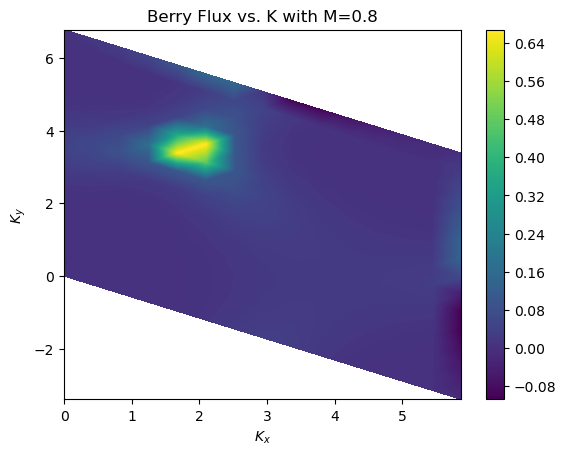

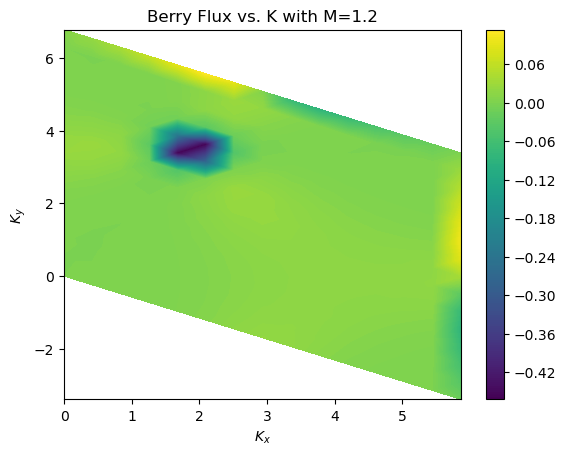

In [350]:
kvec = []
xPoints = []
yPoints = []
for x in range(15): 
    for y in range(15):  
        for atom_type in ['a', 'b']:
            labelJ = ((x, y), atom_type)
            k = momentumLabelsToK2(labelJ, "hal", n[0], n[1])
            kvec.append(k)
            xPoints.append(k[0])
            yPoints.append(k[1])

plt.figure()
plt.title(f"Berry Flux vs. K with M=0.8")
plt.tricontourf(xPoints[::2], yPoints[::2], berry_fluxes[1], levels = 200)
plt.colorbar()
plt.xlabel(r"$K_x$")
plt.ylabel(r"$K_y$")
plt.show()

plt.figure()
plt.title(f"Berry Flux vs. K with M=1.2")
plt.tricontourf(xPoints[::2], yPoints[::2], berry_fluxes[3], levels = 200)
plt.colorbar()
plt.xlabel(r"$K_x$")
plt.ylabel(r"$K_y$")
plt.show()

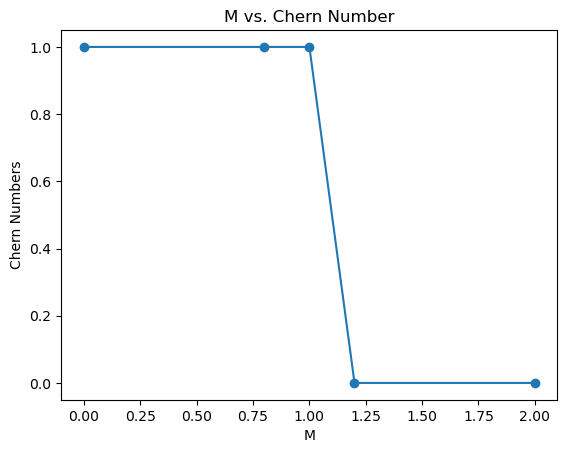

In [352]:
chern_numbers = []
for j in range(len(H_ks)):
    chern_numbers.append(sum(berry_fluxes[j])/(2*np.pi))

plt.figure()
plt.plot(Ms, chern_numbers)
plt.scatter(Ms, chern_numbers)
plt.xlabel("M")
plt.ylabel("Chern Numbers")
plt.title("M vs. Chern Number")
plt.show()

## Edge Modes

In [415]:
def create_hamiltonian_matrix(n, chainType, m=None):
	if chainType == "hydrogen":
		H = np.zeros((n, n), dtype=int)
		for i in range(n):
			for j in range(n):
				if abs(i - j) == 1:
					H[i, j] = -1
		H[0, n-1] = H[n-1, 0] = -1
	elif chainType == "distorted_hydrogen":
		N = 2 * n  
		H = np.zeros((N,N), dtype=float)
		for i in range(N):
			for j in range(N):
				if i == j:
					continue
				if i % 2 == 0:
					H[i, i+1] = H[i+1, i] = -1
				elif i < N - 1 and j < N - 1:
					H[i, i+1] = H[i+1, i] = -0.1
		H[0, N-1] = H[N-1, 0] = -0.1
	elif chainType == "g":
		N1 = n[0]
		N2 = n[1]
		labelsList = Labels2(N1, N2, chainType)
		N = len(labelsList)
		print(N)
		H = np.zeros((N, N), dtype=float)

		neighbor_vectors = [(0, 0), (0, -1), (1, -1)]

		for i, label in enumerate(labelsList):
			(x, y), atom_type = label
			if atom_type == 'a':
				for vec in neighbor_vectors:
					nx = (x + vec[0]) % N1
					ny = (y + vec[1]) % N2
					neighbor_label = ((nx, ny), 'b')
					if (neighbor_label in labelsList):
						j = LabelToIndex2(neighbor_label, chainType, N1, N2)
						H[i, j] = H[j, i] = -1
	elif chainType == "bn":
		M = 0.1
		N1 = n[0]
		N2 = n[1]
		labelsList = Labels2(N1, N2, chainType)
		N = len(labelsList)
		H = np.zeros((N, N), dtype=float)

		for i, label in enumerate(labelsList):
			_, atom_type = label
			if atom_type == 'a':
				H[i, i] = M
			else:  
				H[i, i] = -M

		neighbor_vectors = [(0, 0), (0, -1), (1, -1)]
		for i, label in enumerate(labelsList):
			(x, y), atom_type = label
			if atom_type == 'a':
				for vec in neighbor_vectors:
					nx = (x + vec[0]) % N1
					ny = (y + vec[1]) % N2
					neighbor_label = ((nx, ny), 'b')
					j = LabelToIndex2(neighbor_label, chainType, N1, N2)
					H[i, j] = H[j, i] = -1
	elif chainType == "hal":
		N1 = n[0]  # Periodic in x
		N2 = n[1]  # Open in y
		t = 0.3
		phi = 0.7
		M = m
		labelsList = Labels2(N1, N2, chainType)
		N = len(labelsList)
		H = np.zeros((N, N), dtype=complex)

		# Diagonal terms (sublattice potential)
		for i, label in enumerate(labelsList):
			_, atom_type = label
			H[i, i] = M if atom_type == 'a' else -M

		# Nearest neighbors
		neighbor_vectors = [(0, 0), (0, -1), (1, -1)]
		for i, label in enumerate(labelsList):
			(x, y), atom_type = label
			if atom_type == 'a':
				for vec in neighbor_vectors:
					nx = (x + vec[0])  # Periodic in x
					ny = (y + vec[1]) % N2  # Open in y
					if 0 <= nx < N1:  # Ensure y is within valid range
						neighbor_label = ((nx, ny), 'b')
						j = LabelToIndex2(neighbor_label, chainType, N1, N2)
						H[i, j] = H[j, i] = -1

		# Next-nearest neighbors
		nnn_vectors_a = [((0, 1), phi), ((1, -1), phi), ((-1, 0), phi),  # Clockwise
						((0, -1), -phi), ((-1, 1), -phi), ((1, 0), -phi)]  # Counter-clockwise
		nnn_vectors_b = [((0, -1), phi), ((-1, 1), phi), ((1, 0), phi),  # Clockwise
						((0, 1), -phi), ((1, -1), -phi), ((-1, 0), -phi)]  # Counter-clockwise

		for i, label in enumerate(labelsList):
			(x, y), atom_type = label
			nnn_vectors = nnn_vectors_a if atom_type == 'a' else nnn_vectors_b
			for vec, phase in nnn_vectors:
				nx = (x + vec[0])  
				ny = (y + vec[1]) % N2  
				if 0 <= nx < N1:  # Ensure y is within valid range
					neighbor_label = ((nx, ny), atom_type)
					j = LabelToIndex2(neighbor_label, chainType, N1, N2)
					if i < j:
						H[i, j] += -t * np.exp(1j * phase)
						H[j, i] += -t * np.exp(-1j * phase)
	return H

In [416]:
def is_hermitian(matrix):
    # Check if the matrix is square
    if matrix.shape[0] != matrix.shape[1]:
        return False
    # Check if the matrix is equal to its conjugate transpose
    return np.allclose(matrix, np.conjugate(matrix.T))

In [417]:
n = (5,5)
chainType = "hal"
F = create_fourier_matrix(n, chainType)
F_dagger = np.conjugate(F).T
output = F @ F_dagger
Hr = create_hamiltonian_matrix(n, chainType, m=0.1)
Hk = F_dagger @ Hr @ F

# print(is_hermitian(Hr))
# print(is_hermitian(Hk))

In [418]:
kvec = []
xPoints = []
yPoints = []
for x in range(5): 
    for y in range(5):  
        for atom_type in ['a', 'b']:
            labelJ = ((x, y), atom_type)
            k = momentumLabelsToK2(labelJ, "hal", n[0], n[1])
            kvec.append(k)
            xPoints.append(k[0])
            yPoints.append(k[1])

H_k = Hk
E_vals = []
size = 2*n[0]
for i in range(int(len(H_k)/size)):
    i1, i2 = size*i, size*i + size
    block = H_k[i1:i2,i1:i2]
    eigs, vecs = np.linalg.eigh(block)
    for eig in eigs:
        E_vals.append(eig)


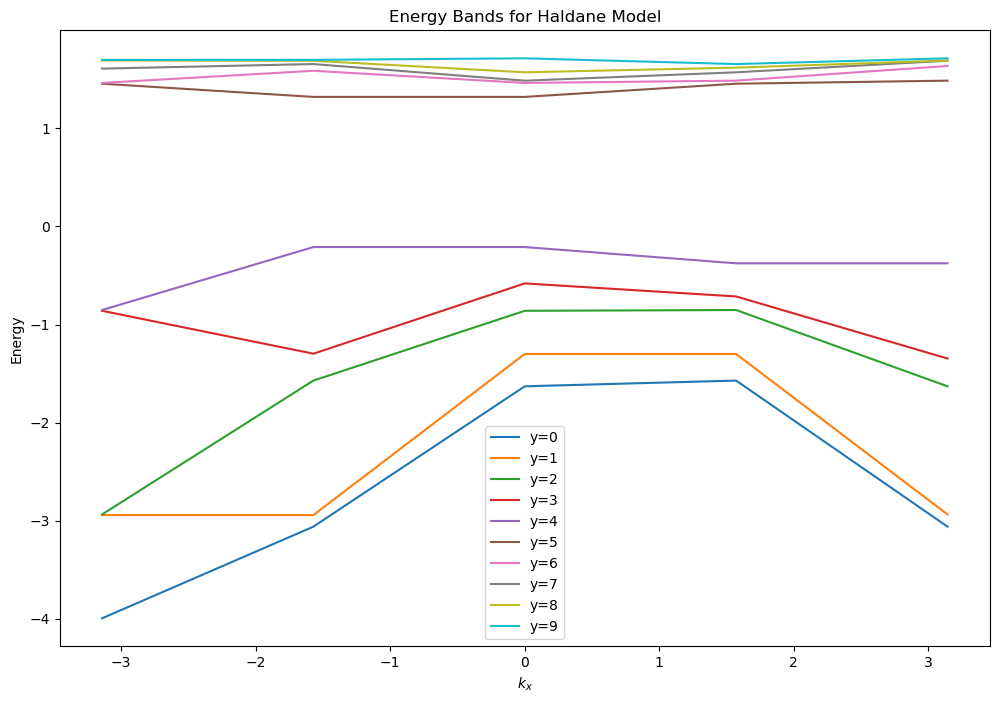

In [419]:
k_x_vals = np.linspace(-np.pi, np.pi, n[0])
E_vals = np.array(E_vals).reshape(n[0], -1)

plt.figure(figsize=(12, 8))
for y in range(n[1] * 2):  # Assuming 2 values for each a,b
    plt.plot(k_x_vals, E_vals[:, y], label=f'y={y}')

plt.xlabel(r"$k_x$")
plt.ylabel("Energy")
plt.title("Energy Bands for Haldane Model")
plt.legend()
plt.show()

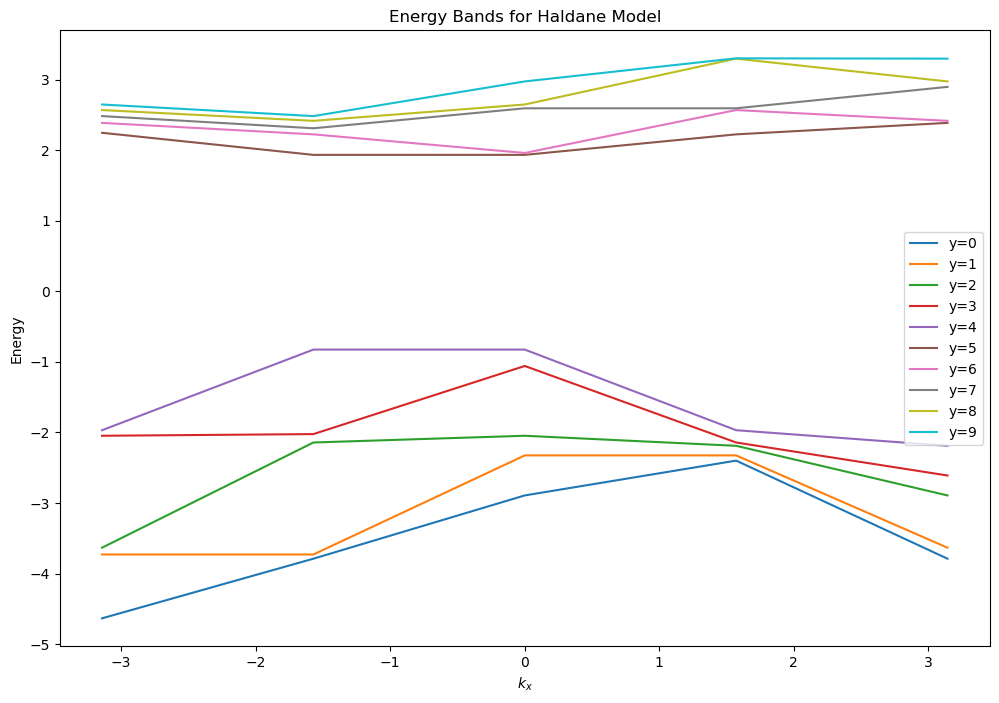

In [420]:
n = (5,5)
chainType = "hal"
F = create_fourier_matrix(n, chainType)
F_dagger = np.conjugate(F).T
output = F @ F_dagger
Hr = create_hamiltonian_matrix(n, chainType, m=2)
Hk = F_dagger @ Hr @ F

kvec = []
xPoints = []
yPoints = []
for x in range(5): 
    for y in range(5):  
        for atom_type in ['a', 'b']:
            labelJ = ((x, y), atom_type)
            k = momentumLabelsToK2(labelJ, "hal", n[0], n[1])
            kvec.append(k)
            xPoints.append(k[0])
            yPoints.append(k[1])

H_k = Hk
E_vals = []
size = 2*n[0]
for i in range(int(len(H_k)/size)):
    i1, i2 = size*i, size*i + size
    block = H_k[i1:i2,i1:i2]
    eigs, vecs = np.linalg.eigh(block)
    for eig in eigs:
        E_vals.append(eig)

k_x_vals = np.linspace(-np.pi, np.pi, n[0])
E_vals = np.array(E_vals).reshape(n[0], -1)

plt.figure(figsize=(12, 8))
for y in range(n[1] * 2):  # Assuming 2 values per y (from 'a' and 'b' types)
    plt.plot(k_x_vals, E_vals[:, y], label=f'y={y}')

plt.xlabel(r"$k_x$")
plt.ylabel("Energy")
plt.title("Energy Bands for Haldane Model")
plt.legend()
plt.show()